In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import math
import matplotlib.pyplot as plt

import env

# Exercise 1

Attendance Data

Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:

    name
    Billy    0.5250
    Jane     0.6875
    John     0.9125
    Sally    0.7625
    Name: grade, dtype: float64

In [7]:
# pull attendance table 

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/tidy_data'
query = '''
SELECT *
FROM attendance
'''
attendance_df = pd.read_sql(query, url)
attendance_df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [42]:
altered_df = attendance_df.melt(id_vars='Unnamed: 0')
altered_df

,Unnamed: 0,variable,value
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [51]:
altered_df.columns = ['student', 'day', 'grade']
altered_df.head()

,student,day,grade
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9


In [44]:
def attendance_grade(grade):
    if grade == 'P':
        return 1
    elif grade == 'H':
        return 0.5
    elif grade == 'T':
        return 0.9
    else:
        return 0
    
# turn the alphabetical grades into numeric grades
altered_df['num_grade'] = altered_df['grade'].apply(attendance_grade)

In [47]:
altered_df = altered_df.drop(columns='grade')

In [49]:
altered_df.head()

,student,day,num_grade
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9


In [50]:
altered_df.groupby('student').num_grade.mean()

student
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: num_grade, dtype: float64

# Exercise 2


Coffee Levels

    Read the coffee_levels table.
    
    Transform the data so that each carafe is in it's own column.
    
    Is this the best shape for the data?



In [3]:
query = '''
SELECT *
FROM coffee_levels
'''
coffee_df = pd.read_sql(query, url)
coffee_df.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [114]:
coffee_pivot = coffee_df.pivot_table(index = ['hour'], columns = 'coffee_carafe', values = 'coffee_amount').reset_index()
coffee_pivot.head()

coffee_carafe,hour,x,y,z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947


# Exercise 3


Cake Recipes

    Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
    
    Tidy the data as necessary.
    
    Which recipe, on average, is the best? recipe b
    
    Which oven temperature, on average, produces the best results? 275
    Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees



In [66]:
query = '''
SELECT *
FROM cake_recipes
'''
cakes_df = pd.read_sql(query, url)
cakes_df

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [67]:
# split recipe:position column
cakes_df[['recipe', 'position']] = cakes_df['recipe:position'].str.split(':', expand = True)
cakes_df = cakes_df.drop(columns='recipe:position')

In [68]:
cakes_df.head()

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom


In [70]:
cakes_melt = cakes_df.melt(id_vars=['recipe', 'position'], var_name='degrees_f', value_name='score')
cakes_melt.head()

,recipe,position,degrees_f,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


In [115]:
cakes_melt.groupby('recipe').mean()
# this shows that Recipe B was the best scored recipe

,score
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


In [72]:
cakes_melt.groupby('degrees_f').mean()
# the best scoring temperature was 275 degrees farenheit

,score
degrees_f,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


In [85]:
cakes_melt.sort_values('score').tail(1)
# The highest score was given to Recipe B at 300 degrees F, placed in the bottom of the oven

,recipe,position,degrees_f,score
26,b,bottom,300,99.248541


# B-B-Bonus!!!

Explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.

In [87]:
query = '''
SELECT *
FROM weather
'''
weather_df = pd.read_sql(query, url)
weather_df.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,None,29.9,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,None,10.7,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
weather_melt = weather_df.melt(id_vars=['id', 'year', 'month', 'element'], var_name='day')
weather_melt.head()

,id,year,month,element,day,value
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


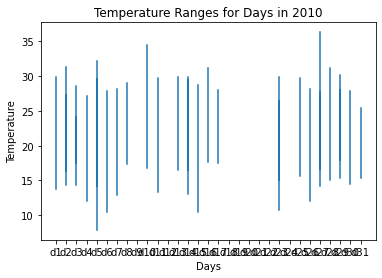

In [112]:
# graph of our tidy dataframe

plt.plot(weather_melt.day, weather_melt.value)
plt.title('Temperature Ranges for Days in 2010')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()